In [491]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [492]:
flight_data = pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv")
flight_data

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [493]:
def create_dataset(dataset, look_back=1):
  trainX, trainY = [], []
  for i in range(len(dataset)-look_back-1):
    trainX.append(dataset[i:i+look_back,0])
    trainY.append(dataset[i+look_back,0])

  return np.array(trainX), np.array(trainY)

In [494]:
fligh_dataX, flight_DataY =create_dataset(flight_data["Passengers"].to_numpy().reshape(-1,1))

In [495]:
fligh_dataX.squeeze(), flight_DataY

(array([112, 118, 132, 129, 121, 135, 148, 148, 136, 119, 104, 118, 115,
        126, 141, 135, 125, 149, 170, 170, 158, 133, 114, 140, 145, 150,
        178, 163, 172, 178, 199, 199, 184, 162, 146, 166, 171, 180, 193,
        181, 183, 218, 230, 242, 209, 191, 172, 194, 196, 196, 236, 235,
        229, 243, 264, 272, 237, 211, 180, 201, 204, 188, 235, 227, 234,
        264, 302, 293, 259, 229, 203, 229, 242, 233, 267, 269, 270, 315,
        364, 347, 312, 274, 237, 278, 284, 277, 317, 313, 318, 374, 413,
        405, 355, 306, 271, 306, 315, 301, 356, 348, 355, 422, 465, 467,
        404, 347, 305, 336, 340, 318, 362, 348, 363, 435, 491, 505, 404,
        359, 310, 337, 360, 342, 406, 396, 420, 472, 548, 559, 463, 407,
        362, 405, 417, 391, 419, 461, 472, 535, 622, 606, 508, 461]),
 array([118, 132, 129, 121, 135, 148, 148, 136, 119, 104, 118, 115, 126,
        141, 135, 125, 149, 170, 170, 158, 133, 114, 140, 145, 150, 178,
        163, 172, 178, 199, 199, 184, 162, 146, 166, 1

In [496]:
months = pd.to_datetime(flight_data.pop('Month'), format='%Y.%m')

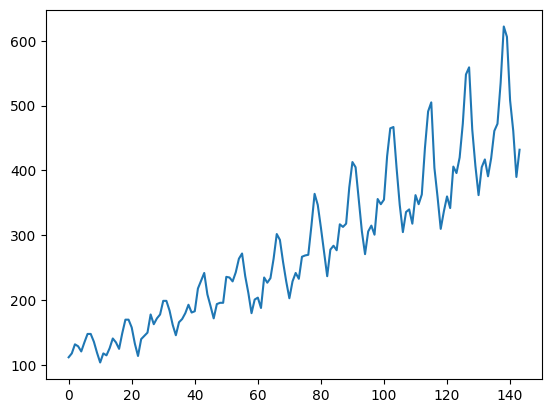

In [497]:
plt.plot(flight_data["Passengers"])

<Axes: xlabel='Month'>

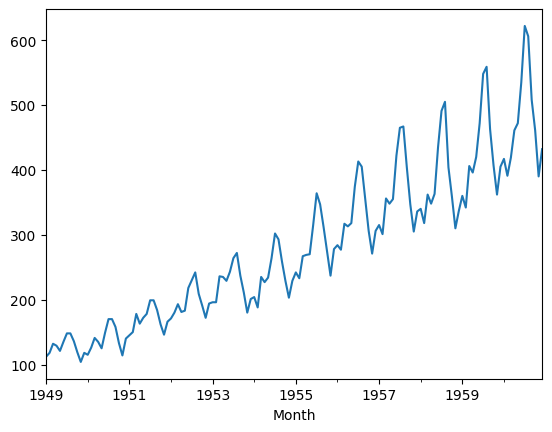

In [498]:
plot_feature = flight_data["Passengers"]
plot_feature.index = months
plot_feature.plot()

In [499]:
tf.random.set_seed(7)

In [500]:
flight_data.dtypes

Passengers    int64
dtype: object

In [501]:
flight_data['Passengers'].astype('float32')

Month
1949-01-01    112.0
1949-02-01    118.0
1949-03-01    132.0
1949-04-01    129.0
1949-05-01    121.0
              ...  
1960-08-01    606.0
1960-09-01    508.0
1960-10-01    461.0
1960-11-01    390.0
1960-12-01    432.0
Name: Passengers, Length: 144, dtype: float32

In [502]:
scaler = MinMaxScaler(feature_range=(0,1))
flight_data = scaler.fit_transform(flight_data)

In [503]:
flight_data.shape

(144, 1)

In [504]:
flight_data

array([[0.01544402],
       [0.02702703],
       [0.05405405],
       [0.04826255],
       [0.03281853],
       [0.05984556],
       [0.08494208],
       [0.08494208],
       [0.06177606],
       [0.02895753],
       [0.        ],
       [0.02702703],
       [0.02123552],
       [0.04247104],
       [0.07142857],
       [0.05984556],
       [0.04054054],
       [0.08687259],
       [0.12741313],
       [0.12741313],
       [0.1042471 ],
       [0.05598456],
       [0.01930502],
       [0.06949807],
       [0.07915058],
       [0.08880309],
       [0.14285714],
       [0.11389961],
       [0.13127413],
       [0.14285714],
       [0.18339768],
       [0.18339768],
       [0.15444015],
       [0.11196911],
       [0.08108108],
       [0.11969112],
       [0.12934363],
       [0.14671815],
       [0.17181467],
       [0.14864865],
       [0.15250965],
       [0.22007722],
       [0.24324324],
       [0.26640927],
       [0.2027027 ],
       [0.16795367],
       [0.13127413],
       [0.173

In [505]:
train_size = int(len(flight_data)*0.67)
train_data = flight_data[0:train_size]
test_data = flight_data[train_size:]
print(len(train_data),len(test_data))

96 48


In [506]:
train_data,test_data

(array([[0.01544402],
        [0.02702703],
        [0.05405405],
        [0.04826255],
        [0.03281853],
        [0.05984556],
        [0.08494208],
        [0.08494208],
        [0.06177606],
        [0.02895753],
        [0.        ],
        [0.02702703],
        [0.02123552],
        [0.04247104],
        [0.07142857],
        [0.05984556],
        [0.04054054],
        [0.08687259],
        [0.12741313],
        [0.12741313],
        [0.1042471 ],
        [0.05598456],
        [0.01930502],
        [0.06949807],
        [0.07915058],
        [0.08880309],
        [0.14285714],
        [0.11389961],
        [0.13127413],
        [0.14285714],
        [0.18339768],
        [0.18339768],
        [0.15444015],
        [0.11196911],
        [0.08108108],
        [0.11969112],
        [0.12934363],
        [0.14671815],
        [0.17181467],
        [0.14864865],
        [0.15250965],
        [0.22007722],
        [0.24324324],
        [0.26640927],
        [0.2027027 ],
        [0

In [507]:
look_back = 1
#train_X, train_Y = create_dataset(train_data.to_numpy())
train_X, train_Y = create_dataset(train_data,look_back)
test_X, test_Y = create_dataset(test_data,look_back)

In [508]:
len(train_X),len(train_Y)

(94, 94)

In [509]:
len(test_X), len(test_Y)

(46, 46)

In [510]:
#pd.DataFrame({'X':scaler.inverse_transform(train_X).reshape(-1),'Y':scaler.inverse_transform(np.array(train_Y).reshape(-1, 1)).reshape(-1)})

In [511]:
train_X[:10], train_Y[:10]

(array([[0.01544402],
        [0.02702703],
        [0.05405405],
        [0.04826255],
        [0.03281853],
        [0.05984556],
        [0.08494208],
        [0.08494208],
        [0.06177606],
        [0.02895753]]),
 array([0.02702703, 0.05405405, 0.04826255, 0.03281853, 0.05984556,
        0.08494208, 0.08494208, 0.06177606, 0.02895753, 0.        ]))

In [512]:
train_X

array([[0.01544402],
       [0.02702703],
       [0.05405405],
       [0.04826255],
       [0.03281853],
       [0.05984556],
       [0.08494208],
       [0.08494208],
       [0.06177606],
       [0.02895753],
       [0.        ],
       [0.02702703],
       [0.02123552],
       [0.04247104],
       [0.07142857],
       [0.05984556],
       [0.04054054],
       [0.08687259],
       [0.12741313],
       [0.12741313],
       [0.1042471 ],
       [0.05598456],
       [0.01930502],
       [0.06949807],
       [0.07915058],
       [0.08880309],
       [0.14285714],
       [0.11389961],
       [0.13127413],
       [0.14285714],
       [0.18339768],
       [0.18339768],
       [0.15444015],
       [0.11196911],
       [0.08108108],
       [0.11969112],
       [0.12934363],
       [0.14671815],
       [0.17181467],
       [0.14864865],
       [0.15250965],
       [0.22007722],
       [0.24324324],
       [0.26640927],
       [0.2027027 ],
       [0.16795367],
       [0.13127413],
       [0.173

In [513]:
train_X.shape,train_Y.shape

((94, 1), (94,))

In [514]:
train_X.shape[0]

94

In [515]:
train_X = np.reshape(train_X,(train_X.shape[0],1,train_X.shape[1]))
test_X = np.reshape(test_X,(test_X.shape[0],1,test_X.shape[1]))

In [516]:
train_X.shape,train_Y.shape

((94, 1, 1), (94,))

In [517]:
test_X.shape,test_Y.shape

((46, 1, 1), (46,))

In [518]:
lstm_model = Sequential()
lstm_model.add(LSTM(4,input_shape=(1, look_back)))
lstm_model.add(Dense(1))

lstm_model.compile(loss='mean_squared_error', optimizer='adam')
lstm_model.fit(train_X,train_Y,epochs=100, batch_size=1, verbose=2)

Epoch 1/100
94/94 - 2s - loss: 0.0230 - 2s/epoch - 22ms/step
Epoch 2/100
94/94 - 0s - loss: 0.0104 - 165ms/epoch - 2ms/step
Epoch 3/100
94/94 - 0s - loss: 0.0085 - 169ms/epoch - 2ms/step
Epoch 4/100
94/94 - 0s - loss: 0.0076 - 171ms/epoch - 2ms/step
Epoch 5/100
94/94 - 0s - loss: 0.0069 - 172ms/epoch - 2ms/step
Epoch 6/100
94/94 - 0s - loss: 0.0059 - 184ms/epoch - 2ms/step
Epoch 7/100
94/94 - 0s - loss: 0.0051 - 190ms/epoch - 2ms/step
Epoch 8/100
94/94 - 0s - loss: 0.0045 - 164ms/epoch - 2ms/step
Epoch 9/100
94/94 - 0s - loss: 0.0039 - 171ms/epoch - 2ms/step
Epoch 10/100
94/94 - 0s - loss: 0.0033 - 176ms/epoch - 2ms/step
Epoch 11/100
94/94 - 0s - loss: 0.0029 - 212ms/epoch - 2ms/step
Epoch 12/100
94/94 - 0s - loss: 0.0026 - 211ms/epoch - 2ms/step
Epoch 13/100
94/94 - 0s - loss: 0.0025 - 199ms/epoch - 2ms/step
Epoch 14/100
94/94 - 0s - loss: 0.0023 - 181ms/epoch - 2ms/step
Epoch 15/100
94/94 - 0s - loss: 0.0022 - 213ms/epoch - 2ms/step
Epoch 16/100
94/94 - 0s - loss: 0.0021 - 171ms/epoc

In [519]:
trainPredict = lstm_model.predict(train_X)
testPredict = lstm_model.predict(test_X)

trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([train_Y])

testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([test_Y])

2/2 [==============================] - 0s 6ms/step


In [520]:
trainPredict.shape,trainY.shape

((94, 1), (1, 94))

In [521]:
trainscore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
testscore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print(trainscore,testscore)

22.663223450027704 49.27569042454015


In [522]:
train_X.shape

(94, 1, 1)

In [523]:
train_X.squeeze().shape

(94,)

In [524]:
test_X.squeeze().shape

(46,)

In [525]:
trainPredict.shape

(94, 1)

In [526]:
trainpredictPlot = np.empty_like(flight_data)
trainpredictPlot[:,:] = np.nan
trainpredictPlot[look_back:look_back+len(trainPredict),:] = trainPredict

In [527]:
trainpredictPlot.shape

(144, 1)

In [528]:
testPredict.shape

(46, 1)

In [529]:
testpredictPlot = np.empty_like(flight_data)
testpredictPlot[:,:] = np.nan
testpredictPlot[len(trainPredict)+(look_back*2)+1:len(flight_data)-1:,:] = testPredict

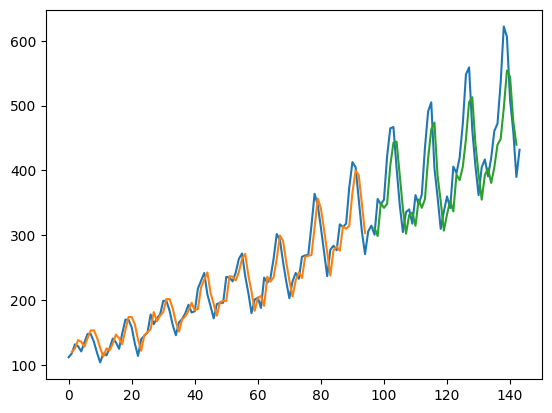

In [530]:
plt.plot(scaler.inverse_transform(flight_data))
plt.plot(trainpredictPlot)
plt.plot(testpredictPlot)
plt.show()